<a href="https://colab.research.google.com/github/ShervinRahimi/new4/blob/master/hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spacy
!pip install newsapi-python

In [ ]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9MB 1.2MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp36-none-any.whl size=829180944 sha256=9929483781991db3f10eac70ab302b20409fc8486379280d9685f389e5afa7ea
  Stored in directory: /tmp/pip-ephem-wheel-cache-1g306uqu/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


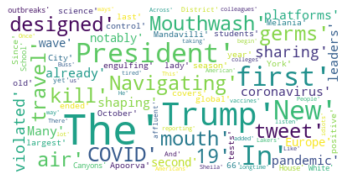

In [ ]:
import spacy
import en_core_web_lg
from newsapi import NewsApiClient
import pickle
import pandas as pd
import string
import numpy as np
from collections import Counter 
import nltk
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud 
from textblob import TextBlob
nltk.download('stopwords')
nltk.download('brown')
nltk.download('punkt')



nlp_eng = en_core_web_lg.load()
newsapi = NewsApiClient(api_key='7fdd45ab5b5540b580b66520b94021ed') #API key is available at https://newsapi.org/

temp = newsapi.get_everything(q='coronavirus', language='en', from_param='2020-10-01', to='2020-10-26', sort_by='relevancy')

filename = 'articlesCOVID.pckl'
pickle.dump(temp, open(filename, 'wb'))
filename = 'articlesCOVID.pckl'
loaded_model = pickle.load(open(filename, 'rb'))
# filepath = '/content/articlesCOVID.pckl'
# pickle.dump(loaded_model, open(filepath, 'wb'))

df = pd.DataFrame(temp['articles'])

#df['description']

tokenizer = RegexpTokenizer(r'\w+')

def get_keywords_eng(token):
  result = []
  punctuation = string.punctuation
  stop_words = stopwords.words('english')
  
  for i in token:
    if (i in stop_words):
      continue
    else:
      result.append(i)

  return result


results = []
for content in df.content.values:
    content = tokenizer.tokenize(content)
    results.append([x[0] for x in Counter(get_keywords_eng(content)).most_common(5)])
df['keywords'] = results


#for plotting
text = str(results)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
df.head(5)


,source,author,title,description,url,urlToImage,publishedAt,content,keywords
0,"{'id': None, 'name': 'Lifehacker.com'}","Beth Skwarecki on Vitals, shared by Beth Skwar...","Sorry, Mouthwash Isn't a Coronavirus Cure",Mouthwash is designed to kill germs in your mo...,https://vitals.lifehacker.com/sorry-mouthwash-...,https://i.kinja-img.com/gawker-media/image/upl...,2020-10-21T19:45:00Z,Mouthwash is designed to kill germs in your mo...,"[Mouthwash, designed, kill, germs, mouth]"
1,"{'id': None, 'name': 'Lifehacker.com'}",Elizabeth Yuko,Check an Airline's Coronavirus Policies Before...,Navigating air travel during the COVID-19 pand...,https://lifehacker.com/check-an-airlines-coron...,https://i.kinja-img.com/gawker-media/image/upl...,2020-10-21T16:00:00Z,Navigating air travel during the COVID-19 pand...,"[Navigating, air, travel, COVID, 19]"
2,"{'id': 'the-verge', 'name': 'The Verge'}",Kim Lyons,"Twitter flags, limits sharing on Trump tweet a...",Twitter disabled sharing options on a tweet fr...,https://www.theverge.com/2020/10/11/21511682/t...,https://cdn.vox-cdn.com/thumbor/1zez70uv4JdlHC...,2020-10-11T19:11:34Z,The tweet violated the platforms rules against...,"[The, tweet, sharing, violated, platforms]"
3,"{'id': None, 'name': 'New York Times'}",Michael Kolomatsky,Coronavirus and Home Design,A recent survey of architects reveals that cli...,https://www.nytimes.com/2020/10/22/realestate/...,https://static01.nyt.com/images/2020/10/22/rea...,2020-10-22T13:00:08Z,The coronavirus pandemic is already shaping ho...,"[pandemic, The, coronavirus, already, shaping]"
4,"{'id': None, 'name': 'New York Times'}",Jonathan Wolfe,Coronavirus Briefing: What Happened Today,What the near future may hold,https://www.nytimes.com/2020/10/12/us/coronavi...,https://static01.nyt.com/images/2020/03/03/wor...,2020-10-12T22:12:24Z,Many leaders most notably President Trump have...,"[Many, leaders, notably, President, Trump]"


In [ ]:
results

[['Mouthwash', 'designed', 'kill', 'germs', 'mouth'],
 ['Navigating', 'air', 'travel', 'COVID', '19'],
 ['The', 'tweet', 'sharing', 'violated', 'platforms'],
 ['pandemic', 'The', 'coronavirus', 'already', 'shaping'],
 ['Many', 'leaders', 'notably', 'President', 'Trump'],
 ['In', 'Europe', 'second', 'wave', 'engulfing'],
 ['Apoorva', 'Mandavilli', 'covers', 'science', 'global'],
 ['Since', 'season', 'ended', 'October', 'last'],
 ['students', 'The', '66', 'year', 'old'],
 ['In', 'New', 'York', 'City', 'largest'],
 ['Trump', 'The', 'first', 'lady', 'Melania'],
 ['President', 'Trump', 'tests', 'positive', 'new'],
 ['control', 'The', 'outbreaks', 'White', 'House'],
 ['The', 'Canyons', 'School', 'District', 'affluent'],
 ['And', 'yet', 'reporting', 'colleagues', 'Sheila'],
 ['Americans', 'Once', 'begin', 'taking', 'vaccines'],
 ['way', 'Like', 'Across', 'American', 'colleges'],
 ['idiots', 'He', 'added', 'People', 'tired'],
 ['Lakers', 'Buss', 'longtime', 'This', 'first'],
 ['us', 'There', '